In [46]:
import pandas as pd
from credit_scorer import CreditScorer
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [49]:
df = pd.read_csv('cs-training.csv')
counter = Counter(df.SeriousDlqin2yrs)
print(counter)

Counter({0: 139974, 1: 10026})


AUC is: 0.8647


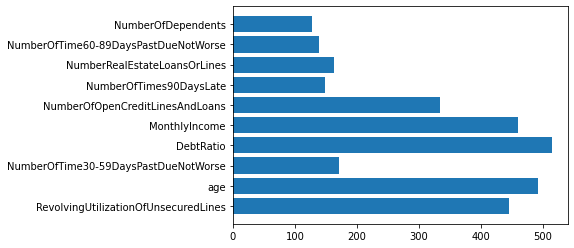

[22:07:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

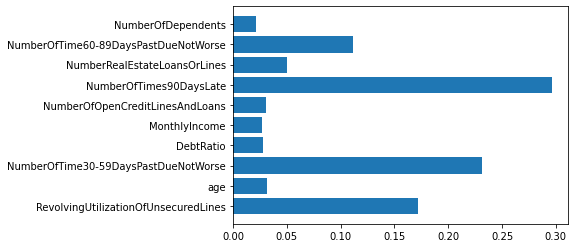

In [51]:
cs_lgb = CreditScorer()
cs_lgb.train_classifier("./models/lgb.pkl",classifier = LGBMClassifier())
cs_lgb.plot_feature_importance()

cs_xgb = CreditScorer()
cs_xgb.train_classifier("./models/xgb.pkl",classifier = XGBClassifier(scale_pos_weight =14))
cs_xgb.plot_feature_importance()

<AxesSubplot:>

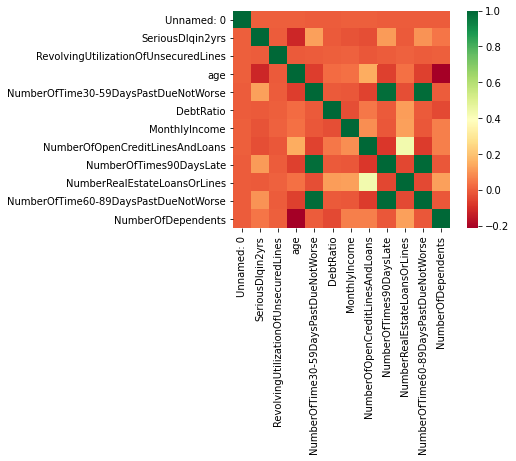

In [8]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

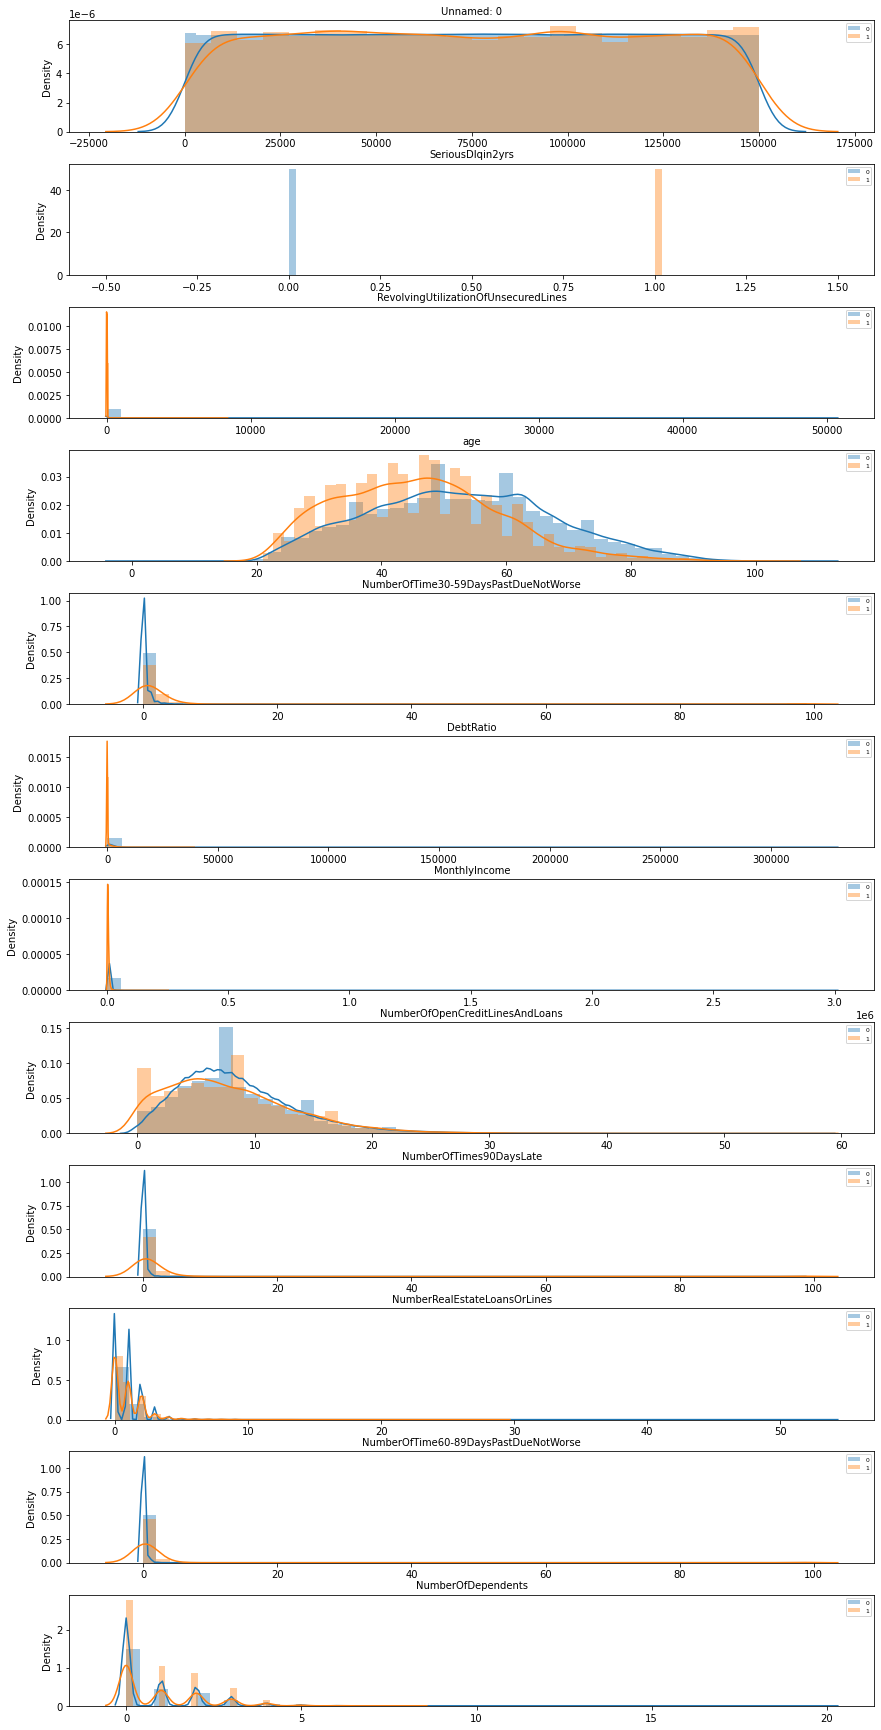

In [45]:
num_columns = len(set(df.columns))
fig, axes = plt.subplots(num_columns, 1, figsize=(12, 24))
fig.tight_layout()

for i, c in enumerate(df.columns.unique()):
    for label in range(2):
        values = df[c][df.SeriousDlqin2yrs == label].values
        sns.distplot(values, ax=axes[i], label=label)
    axes[i].legend(fontsize=6)
    axes[i].set_title(c, fontsize=10)